In [2]:
import os
import pandas as pd

qa_file_name = 'gpt-4o-batch-all-target_extract_gpt-4o-QAExtractor-batch_pid_0.jsonl.csv'
qa_dataset_path = os.path.join(os.path.abspath('../../.cache'), qa_file_name)
df = pd.read_csv(qa_dataset_path)

In [3]:
import json

def get_context(input_text):
    lines = input_text.split('\n')
    for idx, text in enumerate(lines):
        if text.startswith('Here is the context'):
            # The next line will be the context string
            if idx + 1 < len(lines):
                return lines[idx + 1]

def get_quetions_answers_and_groundtruth(df):
    questions = []
    ground_truths = []
    correct_contexts = []

    for row_id, obj_str in enumerate(df['objs']):
        objs = json.loads(obj_str)
        if len(objs) == 0:
            print(f"[Invalid rqa pairs] No objs found at row id: {row_id} which should have {df['qar_num'][row_id]} questions")
        for obj in objs:
            questions.append(obj['Question'])
            ground_truths.append(obj['Answer'])
            correct_contexts.append([get_context(df['input_text'][row_id])])
    return questions, ground_truths, correct_contexts

q, g, c = get_quetions_answers_and_groundtruth(df)

[Invalid rqa pairs] No objs found at row id: 10 which should have 3 questions
[Invalid rqa pairs] No objs found at row id: 126 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 195 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 415 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 457 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 556 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 561 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 574 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 579 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 631 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 641 which should have 1 questions
[Invalid rqa pairs] No objs found at row id: 709 which should have 1 questions


In [1]:
import os
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained(os.path.abspath('../step_3_level_predictor/results/checkpoint-945'))
tokenizer = AutoTokenizer.from_pretrained(os.path.abspath('../step_3_level_predictor/results/checkpoint-945'))

In [2]:
import torch

# Example input text
input_text = "This is an example sentence."

# Tokenize the input
inputs = tokenizer(input_text, return_tensors="pt", truncation=True)

# Put the model in evaluation mode
model.eval()

# Get the prediction
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1)

print(f"Predicted class: {predicted_class.item()}")

Predicted class: 2


In [7]:
import json
import pandas as pd

file_path = "./dataset/gpt-4o-batch-all-target_with_predictor_retrieved_contexts_dataset_condition_2.jsonl"

# Read the JSONL file line by line and convert it into a list of dictionaries
data = []
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line.strip()))  # Parse each line as JSON and add it to the list

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Add a new column for the sum of the lengths of the 'context' field
df['context_length_sum'] = df['context'].apply(lambda context: sum(len(text) for text in context))

# Display the updated DataFrame
df.head()

,question,ground_truth,answer,context,context_length_sum
0,What structural factor allows for easy water a...,Cracked cuticles allow for easy water absorpti...,Cracked cuticles in soybean cultivars allow fo...,[This research investigates the differences in...,1475
1,Why do intact cuticles remain impermeable to w...,Intact cuticles remain impermeable due to the ...,Intact cuticles remain impermeable to water du...,[What components of the intact outer cuticle a...,708
2,How can the permeability of intact cuticles be...,Heat and alkaline treatments can temporarily r...,The permeability of intact cuticles can be tem...,[What components of the intact outer cuticle a...,1660
3,Why has the production of healthy sweeteners l...,The production of healthy sweeteners like fruc...,The production of healthy sweeteners like fruc...,[The production of healthy sweeteners like fru...,856
4,What are the methods mentioned for producing f...,Fructose can be made using either multi-enzyma...,Fructose can be produced using multi-enzymatic...,[Monosaccharides can be generated through vari...,1017


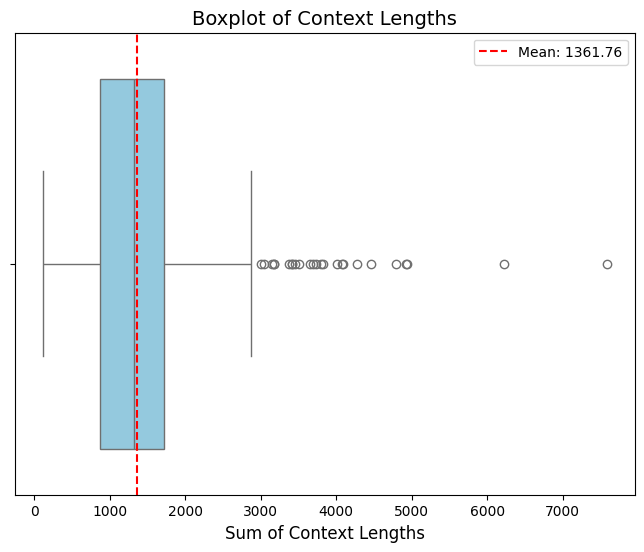

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_length = df['context_length_sum'].mean()

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['context_length_sum'], color="skyblue")

# Display the mean value as a vertical line
plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.2f}')

# Add titles and labels
plt.title("Boxplot of Context Lengths", fontsize=14)
plt.xlabel("Sum of Context Lengths", fontsize=12)
plt.legend()

# Show the plot
plt.show()